In [3]:
 	
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [4]:
df = pd.read_csv("Datos_clasificacion.csv") # read in data downloaded to the local directory
df.head()

,Edad,Diag.Ing1,Diag.Ing2,Diag.Ing3,Diag.Ing4,APACHE,Fallece
0,35,1,0,0,0,10,0
1,87,2,0,0,0,16,0
2,70,4,0,0,0,11,0
3,24,13,0,0,0,11,0
4,24,3,0,0,0,17,0


In [5]:
print(df.shape)
print(pd.value_counts(df['Fallece'], sort = True))

(208, 7)
Fallece
0    176
1     32
Name: count, dtype: int64


C:\Users\anportal\AppData\Local\Temp\ipykernel_13324\1983737910.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(df['Fallece'], sort = True))


C:\Users\anportal\AppData\Local\Temp\ipykernel_13324\545876988.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Fallece'], sort = True)


Text(0, 0.5, 'Number of Observations')

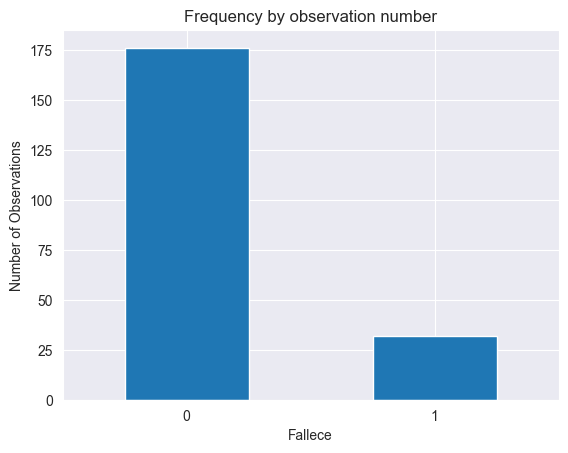

In [6]:
count_classes = pd.value_counts(df['Fallece'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frequency by observation number")
plt.xlabel("Fallece")
plt.ylabel("Number of Observations")

In [7]:
#definimos nuestras etiquetas y features
y = df['Fallece']
X = df.drop('Fallece', axis=1)

In [8]:
# Se realiza el OVerSampling
os =  RandomOverSampler(random_state=42)
X_train_res, y_train_res = os.fit_resample(X, y)
print ("Distribution before resampling {}".format(Counter(y)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({0: 176, 1: 32})
Distribution labels after resampling Counter({0: 176, 1: 176})


In [9]:
#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, train_size=0.8, random_state=42)

In [10]:
# Se aplica el algoritmo de KNN
knnclassifier = KNeighborsClassifier(n_neighbors=3)
knnclassifier.fit(X_train, y_train)
y_pred = knnclassifier.predict(X_test)

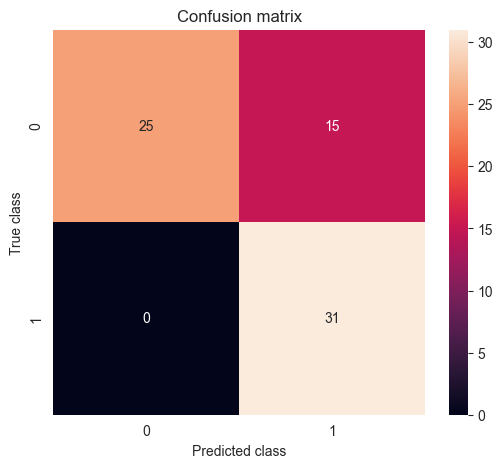

              precision    recall  f1-score   support

           0       1.00      0.62      0.77        40
           1       0.67      1.00      0.81        31

    accuracy                           0.79        71
   macro avg       0.84      0.81      0.79        71
weighted avg       0.86      0.79      0.78        71


In [11]:
# Se crea una matriz de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
print (classification_report(y_test, y_pred))

# MLP

In [12]:
# Se aplica un MLP Classifier
nn=MLPClassifier(activation='relu',solver='sgd',hidden_layer_sizes=(13, 17),random_state=1)
nn.fit(X_train, y_train)
y_pred=nn.predict(X_test)

C:\Users\anportal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


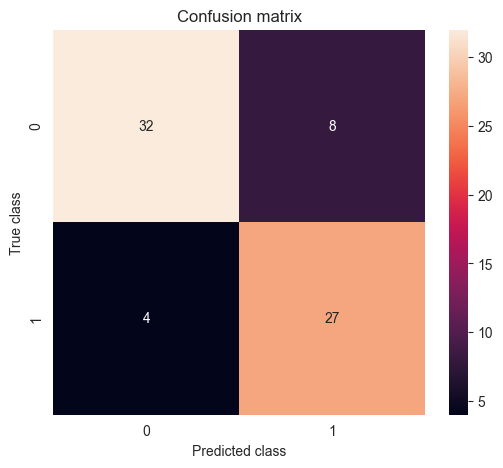

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        40
           1       0.77      0.87      0.82        31

    accuracy                           0.83        71
   macro avg       0.83      0.84      0.83        71
weighted avg       0.84      0.83      0.83        71


In [13]:
# Matriz de Confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
print (classification_report(y_test, y_pred))

In [14]:
# Obtenemos un score
recall_score(y_test, y_pred, average="micro")

0.8309859154929577